# Dataset visualisation and  cleaning

<div class="alert alert-block alert-success">
<b> Data cleaning </b> can be a tedious task. 
According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data. ok.
</div>

## Dataset description and visualisation

<div class="alert alert-block alert-success">
Data visualization is an essential aspect of data analysis that focuses on visually representing data. It provides a visual summary that aids in
processing and understanding information through images, maps, and graphs, simplifying observation, analysis, and comprehension. This is
particularly beneficial for large datasets, where manual processing can be tedious. Moreover, it helps highlight trends, patterns, and outliers.
Python offers a variety of libraries for data visualization, including Plotly, Matplotlib, and Seaborn.
</div>

<div class="alert alert-block alert-warning">Hepatitis is an inflammation of the liver. Most hepatitis patients are often asymptomatic. The Hepatitis dataset contains records of hepatitis cases in individuals and predicts patient survivability. For more details on this dataset, visit: https://archive.ics.
uci.edu/dataset/46/hepatitis <div>

<div class="alert alert-block alert-danger">
    
1. Import the Hepatitis dataset 
2. Print the first 10 samples
3. Print 3 random samples
4. Print the last 5 samples
5. Display the following information about the dataset: columns, number of missing values in each column, and the type of features, all in one instruction.
5. Display only the columns and their types (whether they are numerical or categorical).
6. Display the number of samples and features.
7. Display statistics for all numerical features: count, mean, standard deviation, quantiles, minimum, and maximum values.
8. Verify if the dataset is balanced using a count and a plot.
9. Using the pandas library, perform a line plot, histogram, and box plot for continuous values only. In the line plot, why is the line graph of the
feature ”protime” not continuous?
<\div>

<b>A standard deviation (or σ) </b> is a measure of how dispersed the data is in relation to the mean.

<b> The median </b> is the middle value in a list ordered from smallest to largest.

<b> 25%, 50%, and 75% </b> present the Q1, Median, and Q3 values. 
![title](fig1.png)

## Dataset cleaning

<div class="alert alert-block alert-success">
Data cleaning is a crucial step in the machine learning process for optimal algorithm performance. It involves identifying and correcting issues such as missing values, duplicates, and irrelevant data to ensure accurate, consistent, high-quality, and error-free datasets. Common techniques used in data cleaning include handling missing values, removing duplicates, data type conversion, and outlier detection.
</div>

### Missing values

<div class="alert alert-block alert-success">
Handling missing data is a critical aspect of data preprocessing in machine learning. Effective strategies include imputing missing values
using statistical methods, removing records with missing values, or employing advanced imputation techniques. Each approach has its advantages and limitations, and choosing the right method is essential
for preventing biases and maintaining the integrity of analyses.
</div>

<div class="alert alert-block alert-danger"> 
    
1. Why is data missing? 
2. Print all samples that contain missing values.
3. Print features that contain missing values.
5. Print samples with features that contain missing values.
6. Identify the number of missing values in each feature.
7. Create a new dataframe from the first one and drop samples containing
missing values.
8. Create a new dataframe from the first one and delete columns contain-
ing missing values. Is deleting missing values a solution?
9. Replace missing values using the mean (for continuous values) or mode
(for categorical values) and print the number of missing values after
imputation.
<div/>

### Outliers

<div class="alert alert-block alert-success">
Outliers are data points that significantly deviate from the norm and can arise from various causes, including errors, anomalies, or data variability. Their presence can negatively impact the performance of machine learning models, making it essential to manage outliers for obtaining accurate results. To address outliers, it is important to identify and manage them effectively by either deciding whether to remove them or transforming them to minimize their impact on analysis.
<div/>

<div class="alert alert-block alert-danger">

1. Find and handle outliers in the data using box plots.
2. Compute the Interquartile Range (IQR), upper and lower bounds for
both the alkaline phosphate and bilirubin features, and detect outliers.
3. Handle outliers using an automatic method (not mean or median).
<div/>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
hepatitis_dataset_path = r'hepatitis.csv'  # Update with the correct path
data = pd.read_csv(hepatitis_dataset_path)

# Create box plots to visualize outliers for alkaline phosphate and bilirubin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['alk phosphate'])
plt.title('Box Plot for ALK PHOSPHATE')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['bilirubin'])
plt.title('Box Plot for BILIRUBIN')

plt.tight_layout()
plt.show()



# Function to compute IQR, upper and lower bounds for a feature
def compute_iqr_bounds(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Q1= {Q1} ,Q3=  {Q3}")
    return lower_bound, upper_bound

# Compute bounds for ALK PHOSPHATE
alk_lower_bound, alk_upper_bound = compute_iqr_bounds('alk phosphate')
print(f"ALK PHOSPHATE Lower Bound: {alk_lower_bound}, Upper Bound: {alk_upper_bound}")

# Compute bounds for BILIRUBIN
bilirubin_lower_bound, bilirubin_upper_bound = compute_iqr_bounds('bilirubin')
print(f"BILIRUBIN Lower Bound: {bilirubin_lower_bound}, Upper Bound: {bilirubin_upper_bound}")


alk_outliers = data[(data['alk phosphate'] < alk_lower_bound) | (data['alk phosphate'] > alk_upper_bound)]
print(f"Number of outliers in ALK PHOSPHATE: {len(alk_outliers)}")


bilirubin_outliers = data[(data['bilirubin'] < bilirubin_lower_bound) | (data['bilirubin'] > bilirubin_upper_bound)]
print(f"Number of outliers in BILIRUBIN: {len(bilirubin_outliers)}")



# Handle outliers by clipping values to the upper and lower bounds

# Clip ALK PHOSPHATE outliers
data['alk phosphate'] = data['alk phosphate'].clip(lower=alk_lower_bound, upper=alk_upper_bound)

# Clip BILIRUBIN outliers
data['bilirubin'] = data['bilirubin'].clip(lower=bilirubin_lower_bound, upper=bilirubin_upper_bound)

# Verify that outliers have been handled
alk_outliers_after = data[(data['alk phosphate'] < alk_lower_bound) | (data['alk phosphate'] > alk_upper_bound)]
bilirubin_outliers_after = data[(data['bilirubin'] < bilirubin_lower_bound) | (data['bilirubin'] > bilirubin_upper_bound)]

print(f"Outliers in ALK PHOSPHATE after handling: {len(alk_outliers_after)}")
print(f"Outliers in BILIRUBIN after handling: {len(bilirubin_outliers_after)}")



ModuleNotFoundError: No module named 'seaborn'

## Study of correlation and feature selection

<div class="alert alert-block alert-success">
Feature selection is a crucial process in machine learning that involves
automatically identifying the most relevant features in a dataset that
contribute to the decision-making process. Including irrelevant and
highly correlated features can lead to decreased accuracy. This process
also helps to manage high-dimensional data by reducing overfitting,
enhancing model accuracy, and decreasing training time.
<div/>

<div class="alert alert-block alert-danger"> 

1. Drop the feature ”Sex”.
2. Plot the Pearson correlation heatmap to observe the correlation of in-
dependent variables with the output variable.
3. Only select features that have an absolute correlation above 0.5 with
the output variable.
4. Drop the features that are highly correlated with malaise.
5. Should features be correlated?
<div/>

     patient_id  class  age  steroid  antivirals  fatigue  malaise  anorexia  \
0             1      1   30      0.0           1      1.0      1.0       1.0   
1             2      1   50      0.0           1      0.0      1.0       1.0   
2             3      1   78      1.0           1      0.0      1.0       1.0   
3             4      1   31      NaN           0      1.0      1.0       1.0   
4             5      1   34      1.0           1      1.0      1.0       1.0   
..          ...    ...  ...      ...         ...      ...      ...       ...   
150         151      0   46      1.0           1      0.0      0.0       0.0   
151         152      1   44      1.0           1      0.0      1.0       1.0   
152         153      1   61      0.0           1      0.0      0.0       1.0   
153         154      1   53      0.0           1      0.0      1.0       1.0   
154         155      0   43      1.0           1      0.0      1.0       1.0   

     liver big  liver firm  spleen palp

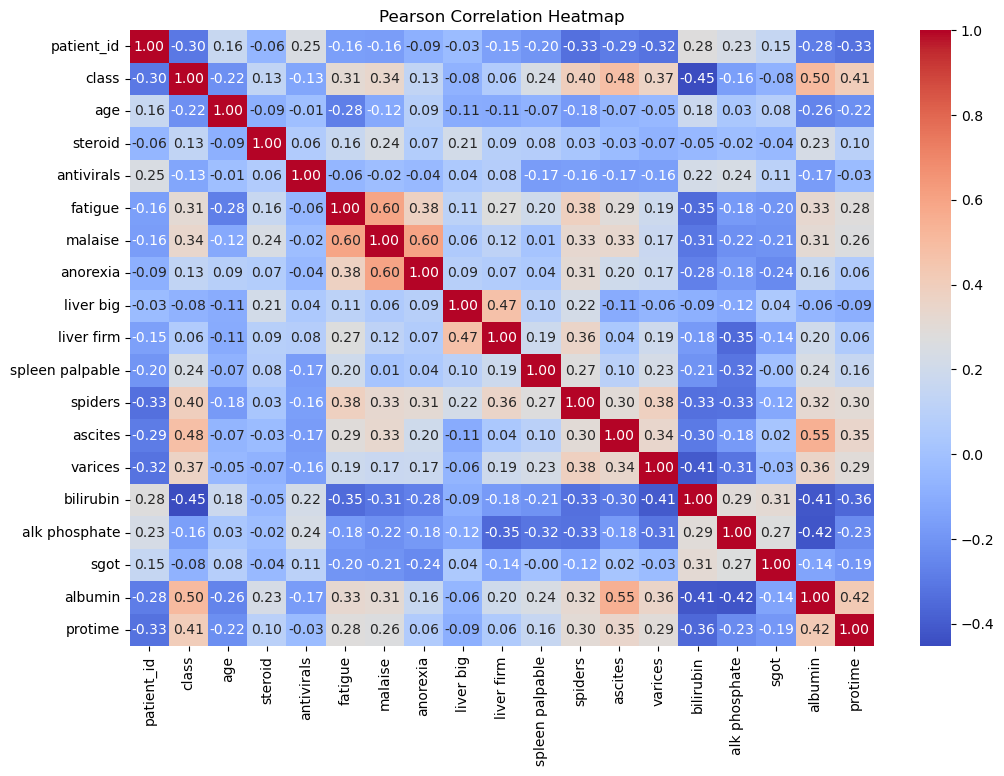

Selected features with correlation > 0.5: Index(['class', 'albumin'], dtype='object')
Dropped highly correlated features: []


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1- Drop the feature ”Sex”.
data = data.drop(columns=['sex'])
print(data)

#2 ---
# Compute correlation matrix
corr_matrix = data.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson Correlation Heatmap")
plt.show()

#3 ---
# Correlation with the target variable (class)
target_corr = corr_matrix['class'].abs()  # Get absolute correlation with 'class'

# Select features with correlation above 0.5
relevant_features = target_corr[target_corr > 0.5].index

# Display selected features
print("Selected features with correlation > 0.5:", relevant_features)


# 4 -- ---
# Drop highly correlated features (correlation > 0.75)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

# Drop these features
data = data.drop(columns=to_drop)
print("Dropped highly correlated features:", to_drop)

# 5 - ----

# Should Features Be Correlated?
# Yes, features should be correlated with the output variable, as it indicates they contribute useful information for predicting the target.
# No, highly correlated features with each other should be removed to avoid redundancy (multicollinearity), which can distort model training.


## Data splitting

<div class="alert alert-block alert-success">
Data splitting is the process of dividing a dataset into two or more subsets, typically comprising a training set and a testing set. This ensures that models are trained on one subset of the data (training set) while being evaluated on another (test set), which helps effectively assess their performance and improve generalization. In Python, the scikit-learn library is a popular choice for implementing data splitting, offering various functions and classes to facilitate this essential process.
<div/>

<div class="alert alert-block alert-danger">

1. Split the data into training and test sets using the hold-out and strat-
ified hold-out strategies.
2. Display the number of samples in each class for both strategies in the
training and test sets.
<div/>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your dataframe and 'Class' is the target variable
# Step 1: Encode target labels if needed
# Assuming the target variable "Class" is in text form (DIE, LIVE), we need to encode it.
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])  # Converts DIE to 0, LIVE to 1

# Features and Target
X = data.drop('class', axis=1)  # Drop the target column to get the features
y = data['class']  # Target column (Class)

### 1. Hold-Out Strategy ###
# Split the data into 80% training and 20% test sets (random hold-out split)
X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of samples in each class for both training and test sets
print("Hold-Out Strategy:")
print(f"Training set class distribution:\n{y_train_holdout.value_counts()}")
print(f"Test set class distribution:\n{y_test_holdout.value_counts()}")

### 2. Stratified Hold-Out Strategy ###
# Split the data with stratification (to preserve class distribution)
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the number of samples in each class for both training and test sets (stratified)
print("\nStratified Hold-Out Strategy:")
print(f"Training set class distribution:\n{y_train_strat.value_counts()}")
print(f"Test set class distribution:\n{y_test_strat.value_counts()}")


Hold-Out Strategy:
Training set class distribution:
class
1    99
0    25
Name: count, dtype: int64
Test set class distribution:
class
1    24
0     7
Name: count, dtype: int64

Stratified Hold-Out Strategy:
Training set class distribution:
class
1    98
0    26
Name: count, dtype: int64
Test set class distribution:
class
1    25
0     6
Name: count, dtype: int64
